# BREAST CANCER ANALYSIS

This project applies logistic regression to classify breast cancer tumors as malignant or benign using the Breast Cancer dataset from Kaggle. 

It includes data preprocessing, model training, evaluation with accuracy and confusion matrix, and visualization of results. Ideal for beginners exploring binary classification in machine learning.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Importing the Dataset

In [2]:
data = r'C:\Users\Jessica Grant\Desktop\Breast Cancer Dataset\Breast_Cancer_Project\breast_cancer.csv'
df = pd.read_csv(data)

In [3]:
# Preview the first few rows of the dataset
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Exploratory Data Analysis

In [4]:
# Check for missing values
df.isnull()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
678,False,False,False,False,False,False,False,False,False,False
679,False,False,False,False,False,False,False,False,False,False
680,False,False,False,False,False,False,False,False,False,False
681,False,False,False,False,False,False,False,False,False,False


In [5]:
# Dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [6]:
# View dimensions of the dataset
df.shape

(683, 10)

In [7]:
# Round dataset description to 2 decimal places
round(df.describe(),2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00,683.00
mean,4.44,3.15,3.22,2.83,3.23,3.54,3.45,2.87,1.60,2.70
std,2.82,3.07,2.99,2.86,2.22,3.64,2.45,3.05,1.73,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


In [8]:
# Check for missing values
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Box Plot to Visualize Outliners

Text(0, 0.5, 'Marginal Adhesion')

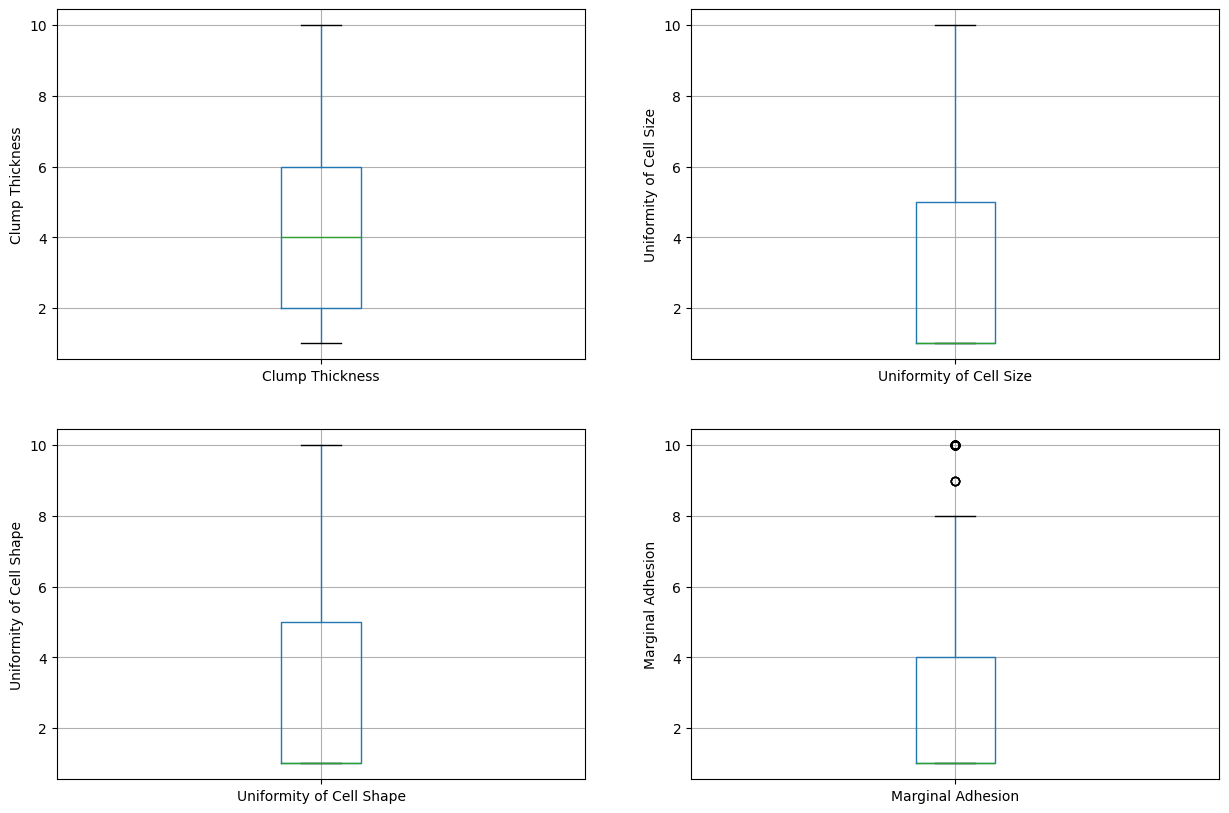

In [9]:
plt.figure(figsize = (15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column ='Clump Thickness')
fig.set_title('')
fig.set_ylabel('Clump Thickness')

plt.subplot(2, 2, 2)
fig = df.boxplot(column ='Uniformity of Cell Size')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Size')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='Uniformity of Cell Shape')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Shape')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Marginal Adhesion')
fig.set_title('')
fig.set_ylabel('Marginal Adhesion')

Text(0, 0.5, 'Class')

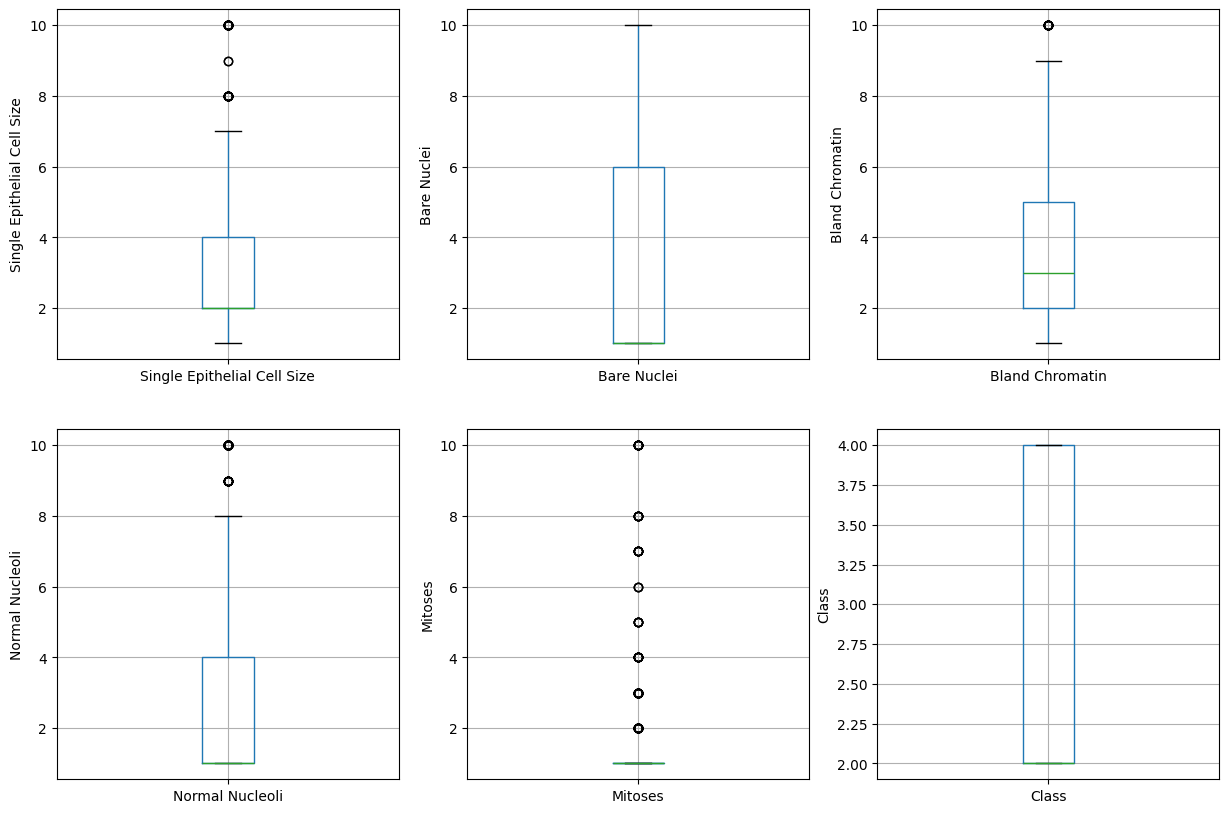

In [10]:
# Boxplot to visualize outliers
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='Single Epithelial Cell Size')
fig.set_title('')
fig.set_ylabel('Single Epithelial Cell Size')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='Bare Nuclei')
fig.set_title('')
fig.set_ylabel('Bare Nuclei')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='Bland Chromatin')
fig.set_title('')
fig.set_ylabel('Bland Chromatin')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='Normal Nucleoli')
fig.set_title('')
fig.set_ylabel('Normal Nucleoli')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Mitoses')
fig.set_title('')
fig.set_ylabel('Mitoses')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='Class')
fig.set_title('')
fig.set_ylabel('Class')

In [11]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [12]:
#Replace values in class with 0 or 1
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

In [13]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


## Model Building

In [14]:
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
# check the dimension of X_train and X_test

X_train.shape, X_test.shape

((512, 9), (171, 9))

In [17]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1


In [18]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [19]:
cols=X_train.columns

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)


X_test = scaler.fit_transform(X_test)


In [21]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [22]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.040834e-17,3.382711e-17,-5.377643e-17,1.908196e-17,0.000000,-4.076600e-17,-6.938894e-18,-6.938894e-18,-2.081668e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.221435e+00,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.990024,-6.808444e-01,-9.877481e-01,-6.206996e-01,-3.374390e-01
25%,-8.646895e-01,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.546549,-6.808444e-01,-5.860587e-01,-6.206996e-01,-3.374390e-01
50%,-1.511987e-01,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.546549,-6.808444e-01,-1.843692e-01,-6.206996e-01,-3.374390e-01
75%,5.622921e-01,6.128747e-01,6.152435e-01,4.203868e-01,0.340402,4.257979e-01,6.190098e-01,3.432990e-01,-3.374390e-01
max,1.989274e+00,2.252330e+00,2.308817e+00,2.534018e+00,3.001253,1.809101e+00,2.627457e+00,2.271296e+00,4.915666e+00


In [23]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg =LogisticRegression(random_state=0)


# fit model
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [25]:
# probability of getting output as zero

logreg.predict_proba(X_test)[:,0]

array([9.92758060e-01, 9.95623318e-01, 8.29178742e-02, 1.58648973e-02,
       9.98448490e-01, 9.95790840e-01, 9.85739594e-01, 4.29379748e-04,
       9.96225400e-01, 9.97851047e-01, 1.16079904e-03, 9.89058694e-01,
       5.92460619e-05, 9.95623318e-01, 9.78640771e-01, 6.92498549e-01,
       7.22550493e-03, 1.12640502e-03, 3.55118061e-04, 9.85762155e-01,
       9.95623318e-01, 9.92459012e-01, 3.64385038e-01, 9.96838142e-01,
       5.69673986e-03, 4.84687336e-03, 9.91445688e-01, 9.95531647e-01,
       9.93567144e-01, 3.80671880e-03, 9.98448490e-01, 1.79013416e-04,
       2.10425928e-05, 9.93944578e-01, 9.95488733e-01, 9.93944578e-01,
       6.45333653e-03, 3.70916192e-02, 9.95488733e-01, 1.78715595e-03,
       9.86971982e-01, 9.73793599e-01, 9.96014207e-01, 9.97567177e-01,
       9.98448490e-01, 9.93964219e-01, 9.97729283e-01, 5.53738255e-04,
       9.90612436e-01, 9.93567144e-01, 8.21569247e-03, 9.90885366e-01,
       2.83704044e-02, 9.91722467e-01, 9.85762155e-01, 9.84331882e-01,
      

In [26]:
logreg.predict_log_proba(X_test)[:,1]

array([-4.92786621e+00, -5.43146428e+00, -8.65582515e-02, -1.59920918e-02,
       -6.46852673e+00, -5.47049218e+00, -4.25026842e+00, -4.29471958e-04,
       -5.57946073e+00, -6.14277472e+00, -1.16147329e-03, -4.51521014e+00,
       -5.92478171e-05, -5.43146428e+00, -3.84627137e+00, -1.17927547e+00,
       -7.25173531e-03, -1.12703989e-03, -3.55181130e-04, -4.25185170e+00,
       -5.43146428e+00, -4.88740207e+00, -4.53162304e-01, -5.75659542e+00,
       -5.71302818e-03, -4.85865754e-03, -4.76131979e+00, -5.41073545e+00,
       -5.04633673e+00, -3.81398279e-03, -6.46852673e+00, -1.79029440e-04,
       -2.10428142e-05, -5.10680127e+00, -5.40117729e+00, -5.10680127e+00,
       -6.47424933e-03, -3.77970111e-02, -5.40117729e+00, -1.78875482e-03,
       -4.34065302e+00, -3.64175160e+00, -5.52501900e+00, -6.01870289e+00,
       -6.46852673e+00, -5.11005005e+00, -6.08765960e+00, -5.53891625e-04,
       -4.66836947e+00, -5.04633673e+00, -8.24962727e-03, -4.69787398e+00,
       -2.87806216e-02, -

In [27]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9474


In [28]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9805


In [30]:
y_test.value_counts()

Class
0    107
1     64
Name: count, dtype: int64

In [31]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[103   4]
 [  5  59]]

True Positives(TP) =  103

True Negatives(TN) =  59

False Positives(FP) =  4

False Negatives(FN) =  5


<Axes: >

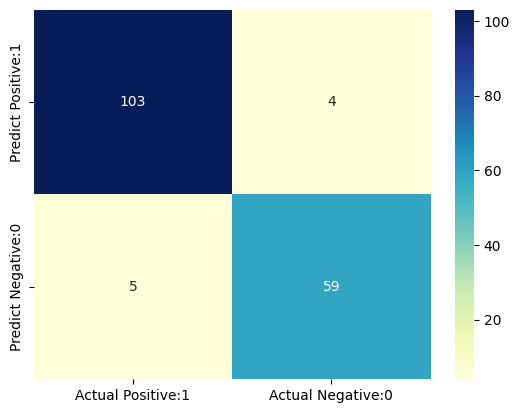

In [32]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [34]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9474


In [35]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0526


In [36]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9626


In [37]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9537


In [38]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0635


In [39]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9365


## Experimenting with different threshold values

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

for i in range(1, 5):
    cm1 = 0
    y_pred1 = logreg.predict_proba(X_test)[:, 1]
    threshold = i / 10
    y_pred2 = (y_pred1 > threshold).astype(int)
    cm1 = confusion_matrix(y_test, y_pred2)

    print(
        'With',
        threshold,
        'threshold the Confusion Matrix is ',
        '\n\n',
        cm1,
        '\n\n',
        'with',
        cm1[0, 0] + cm1[1, 1],
        'correct predictions, ',
        '\n\n',
        cm1[0, 1],
        'Type I errors( False Positives), ',
        '\n\n',
        cm1[1, 0],
        'Type II errors( False Negatives), ',
        '\n\n',
        'Accuracy score: ',
        accuracy_score(y_test, y_pred2),
        '\n\n',
        'Sensitivity: ',
        cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])),
        '\n\n',
        'Specificity: ',
        cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])),
        '\n\n',
        '====================================================',
        '\n\n',
    )

With 0.1 threshold the Confusion Matrix is  

 [[102   5]
 [  0  64]] 

 with 166 correct predictions,  

 5 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9707602339181286 

 Sensitivity:  1.0 

 Specificity:  0.9532710280373832 



With 0.2 threshold the Confusion Matrix is  

 [[102   5]
 [  2  62]] 

 with 164 correct predictions,  

 5 Type I errors( False Positives),  

 2 Type II errors( False Negatives),  

 Accuracy score:  0.9590643274853801 

 Sensitivity:  0.96875 

 Specificity:  0.9532710280373832 



With 0.3 threshold the Confusion Matrix is  

 [[102   5]
 [  4  60]] 

 with 162 correct predictions,  

 5 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.9473684210526315 

 Sensitivity:  0.9375 

 Specificity:  0.9532710280373832 



With 0.4 threshold the Confusion Matrix is  

 [[103   4]
 [  5  59]] 

 with 162 correct predictions,  

 4 Type I errors( False Positives),  


In [41]:
# Set the threshold
threshold = 0.1

# Create a dictionary with class weights
class_weights = {0: threshold, 1: 1 - threshold}

# Instantiate the model with class weights
logreg_1 = LogisticRegression(class_weight=class_weights, random_state=0)

# Fit the model
logreg_1.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: 0.1, 1: 0.9}"
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [42]:
y_pred_test_1 = logreg_1.predict(X_test)

y_pred_test_1

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_1)))

Model accuracy score: 0.9708


In [44]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, y_pred_test_1)

print('Confusion matrix\n\n', cm_1)

print('\nTrue Positives(TP) = ', cm_1[0,0])

print('\nTrue Negatives(TN) = ', cm_1[1,1])

print('\nFalse Positives(FP) = ', cm_1[0,1])

print('\nFalse Negatives(FN) = ', cm_1[1,0])

Confusion matrix

 [[102   5]
 [  0  64]]

True Positives(TP) =  102

True Negatives(TN) =  64

False Positives(FP) =  5

False Negatives(FN) =  0


<Axes: >

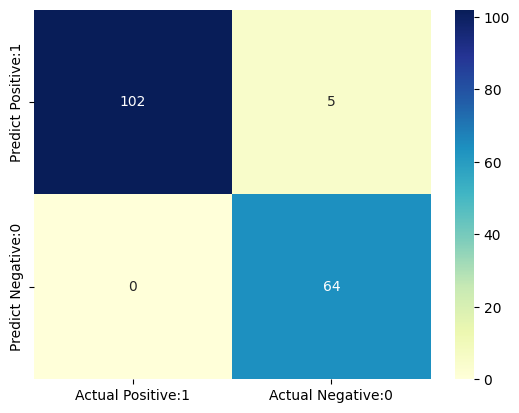

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
print(classification_report(y_test, y_pred_test_1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       107
           1       0.93      1.00      0.96        64

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



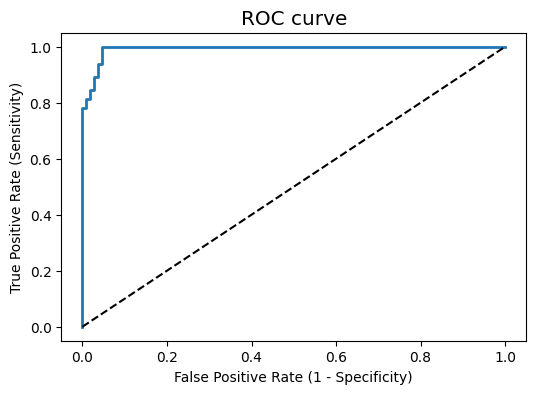

In [47]:
# plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [48]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9931


In [49]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_1, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores.mean()))

Cross-validation scores:0.9746240243670284
